In [1]:
!pip install arxiv

In [2]:
import arxiv
import pandas as pd

In [3]:
keyphrases = ['"image synthesis"', 'deepfake', 'deepfake?', '"deep-fake"', '"voice cloning"', 'fake AND voice']
#keyphrases = []
#voice conversion



#deepfake"
#'"deep fake"'
#'"fake video"'
#'"video forgery"'
#'"image generation" "face"'

In [8]:
from ast import literal_eval
from tqdm.notebook import tqdm

def do_search(keyphrase):
    
    search = arxiv.Search(
      query = keyphrase,
      #id_list: List[str] = [],
      max_results = 10000,
      sort_by = arxiv.SortCriterion.SubmittedDate,
      #sort_by: SortCriterion = SortCriterion.Relevanvce,
      sort_order = arxiv.SortOrder.Descending)
    
    return search

def parse_search_to_df(search):
    
    results = []
  
    for raw_result in tqdm(search.results()):
        parsed_result = {}
        parsed_result["published"] = raw_result.published
        parsed_result["url"] = raw_result.entry_id
        parsed_result["title"] = raw_result.title
        parsed_result["primary_category"] = raw_result.primary_category
        parsed_result["categories"] = raw_result.categories
        parsed_result["abstract"] = raw_result.summary
        results.append(parsed_result)
    
    local_result_df = pd.DataFrame(results)
    if results:
        local_result_df["published"] = pd.to_datetime(local_result_df["published"])
        local_result_df.set_index("published", inplace=True)
        local_result_df["categories"] = local_result_df["categories"].astype(str)
    
    return local_result_df

def do_keyphrase_list(keyphrases):
    
    for keyphrase in tqdm(keyphrases):
        if "local_result_df" in locals():
            tmp_df = parse_search_to_df(do_search(keyphrase))
            local_result_df = pd.concat([local_result_df,tmp_df])#, ignore_index=True)
            local_result_df.drop_duplicates(inplace=True)
        else:
            local_result_df = parse_search_to_df(do_search(keyphrase))

    local_result_df["categories"] = local_result_df["categories"].apply(lambda x: literal_eval(str(x)))
    return local_result_df

result_df = do_keyphrase_list(keyphrases)
result_df




  0%|          | 0/6 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,url,title,primary_category,categories,abstract
published,,,,,
2022-09-13 17:47:39+00:00,http://arxiv.org/abs/2209.06192v1,StoryDALL-E: Adapting Pretrained Text-to-Image...,cs.CV,"[cs.CV, cs.AI, cs.CL]",Recent advances in text-to-image synthesis hav...
2022-09-09 12:42:00+00:00,http://arxiv.org/abs/2209.04275v1,Temporally Adjustable Longitudinal Fluid-Atten...,eess.IV,"[eess.IV, cs.CV, physics.med-ph]",Multiple Sclerosis (MS) is a chronic progressi...
2022-09-09 10:17:49+00:00,http://arxiv.org/abs/2209.04223v1,Pathology Synthesis of 3D Consistent Cardiac M...,eess.IV,"[eess.IV, cs.CV]",We propose a method for synthesizing cardiac M...
2022-09-09 08:44:06+00:00,http://arxiv.org/abs/2209.04183v1,Generative Deformable Radiance Fields for Dise...,cs.CV,[cs.CV],3D-aware generative models have demonstrated t...
2022-09-06 14:37:01+00:00,http://arxiv.org/abs/2209.02536v1,Semantic Image Synthesis with Semantically Cou...,cs.CV,"[cs.CV, cs.AI]",Semantic image synthesis enables control over ...
...,...,...,...,...,...
2019-05-29 15:28:35+00:00,http://arxiv.org/abs/1905.12531v1,Measuring the Effectiveness of Voice Conversio...,eess.AS,[eess.AS],This paper evaluates the effectiveness of a Cy...
2019-04-13 20:51:26+00:00,http://arxiv.org/abs/1904.06591v1,Towards Vulnerability Analysis of Voice-Driven...,cs.CR,"[cs.CR, cs.SD, eess.AS, 92C55, I.2.1; I.5.4]",Fake audio detection is expected to become an ...
2018-04-23 13:54:47+00:00,http://arxiv.org/abs/1804.08438v2,A Spoofing Benchmark for the 2018 Voice Conver...,eess.AS,"[eess.AS, cs.CL, cs.SD, stat.ML]",Voice conversion (VC) aims at conversion of sp...


In [9]:
print("Total number of papers",len(result_df))

Total number of papers 1106


<AxesSubplot:xlabel='published'>

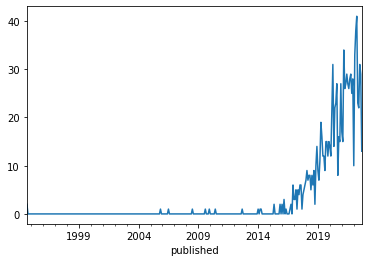

In [10]:
result_df["url"].resample("1M").count().plot()

In [ ]:
#filter categories

In [ ]:
result_df.primary_category.value_counts()

In [44]:
for abst in result_df["abstract"]:
    print(abst,"\n\n")

We present \textbf{FakeET}-- an eye-tracking database to understand human
visual perception of \emph{deepfake} videos. Given that the principal purpose
of deepfakes is to deceive human observers, FakeET is designed to understand
and evaluate the ease with which viewers can detect synthetic video artifacts.
FakeET contains viewing patterns compiled from 40 users via the \emph{Tobii}
desktop eye-tracker for 811 videos from the \textit{Google Deepfake} dataset,
with a minimum of two viewings per video. Additionally, EEG responses acquired
via the \emph{Emotiv} sensor are also available. The compiled data confirms (a)
distinct eye movement characteristics for \emph{real} vs \emph{fake} videos;
(b) utility of the eye-track saliency maps for spatial forgery localization and
detection, and (c) Error Related Negativity (ERN) triggers in the EEG
responses, and the ability of the \emph{raw} EEG signal to distinguish between
\emph{real} and \emph{fake} videos. 


In this work, we describe a new d

In [14]:
for abst in result_df[result_df.primary_category=="physics.med-ph"]["abstract"]:
    print(abst,"\n\n")

Contrast resolution beyond the limits of conventional cone-beam CT (CBCT)
systems is essential to high-quality imaging of the brain. We present a deep
learning reconstruction method (dubbed DL-Recon) that integrates physically
principled reconstruction models with DL-based image synthesis based on the
statistical uncertainty in the synthesis image. A synthesis network was
developed to generate a synthesized CBCT image (DL-Synthesis) from an
uncorrected filtered back-projection (FBP) image. To improve generalizability
(including accurate representation of lesions not seen in training), voxel-wise
epistemic uncertainty of DL-Synthesis was computed using a Bayesian inference
technique (Monte-Carlo dropout). In regions of high uncertainty, the DL-Recon
method incorporates information from a physics-based reconstruction model and
artifact-corrected projection data. Two forms of the DL-Recon method are
proposed: (i) image-domain fusion of DL-Synthesis and FBP (DL-FBP) weighted by
DL uncertai

In [ ]:
#arima

- "deepfake"
- '"deep fake"'
- '"fake video"'
- '"video forgery"'
- '"image generation" "face"'

?? "video editing"
?? "image inpainting"

ARXIV time bias!!!!!


Arxiv: image synthesis kulcsszó CS-re szűrve jó lehet!

" használata harmadolja a találatokat


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=image+synthesis&terms-0-field=all&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=all_dates&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first



#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

publish_df = pd.to_datetime(publish_dates).to_frame().resample("1M").count()

#publish_df = publish_df[publish_df.index.year >= 2016]


model = auto_arima(publish_df, start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=10):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

STEPS = 60

pred_df = forecast_to_df(model, steps=STEPS)

print(model)
print(publish_df.index[-1])

pred_df.set_index(pd.date_range(start=publish_df.index[-1],periods=STEPS, freq="1M"), inplace=True)
fig, ax = plt.subplots(figsize=(22,7))
ax.plot(publish_df[publish_df.index.year >= 2016],label='Monthly publication frequencies')
ax.plot(pred_df, label=['Lower dound',"Upper bound",'Projection mean'])
ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
ax.legend()
plt.plot()